# Exploratory Data Analysis for Jigsaw Miltilingual Toxic Comment Classification

In [1]:
# Import the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import TextBlob

In [2]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

# Load the Dataset

In [3]:
# Read all train .csv files
toxic_comment_processed_seqlen = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv')
toxic_comment = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv')
unintended_bias_preprocessed = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv')
unintended_bias = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv')

toxic_comment_processed_seqlen.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
toxic_comment.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
unintended_bias_preprocessed.head()

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,input_word_ids,input_mask,all_segment_id
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 10747, 10124, 10380, 67420, 119, 10377, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 91327, 13028, 106, 106, 10747, 10894, 13...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 10747, 10124, 11049, 10151, 10399, 22500...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 12034, 10531, 26133, 146, 112, 22469, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,0,0,1,0,0.0,4,47,"(101, 10228, 10921, 13028, 75980, 12682, 10301...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
unintended_bias.head()

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


To understand these datasets better, we should start by exploring the distribution of toxicity levels and their subcategories. Analyze the comment text to identify patterns or specific words that might be indicative of toxic behavior. We can also investigate the relationships between different subcategories to identify possible correlations. Ultimately, we will use this data to train a machine learning model that can accurately predict the toxicity level of unseen comments.

In [7]:
# Calculate the percentage of toxic comments in both datasets
toxic_percentage = toxic_comment['toxic'].value_counts(normalize=True) * 100
unintended_bias_toxic_percentage = (unintended_bias['toxic'] > 0.5).value_counts(normalize=True) * 100

In [8]:
# Let us print the result to see the disrtribution
print(toxic_percentage)

0    90.434312
1     9.565688
Name: toxic, dtype: float64


In [9]:
print(unintended_bias_toxic_percentage)

False    94.100181
True      5.899819
Name: toxic, dtype: float64


Now, we want to plot the distribution of toxic comments in both datasets.

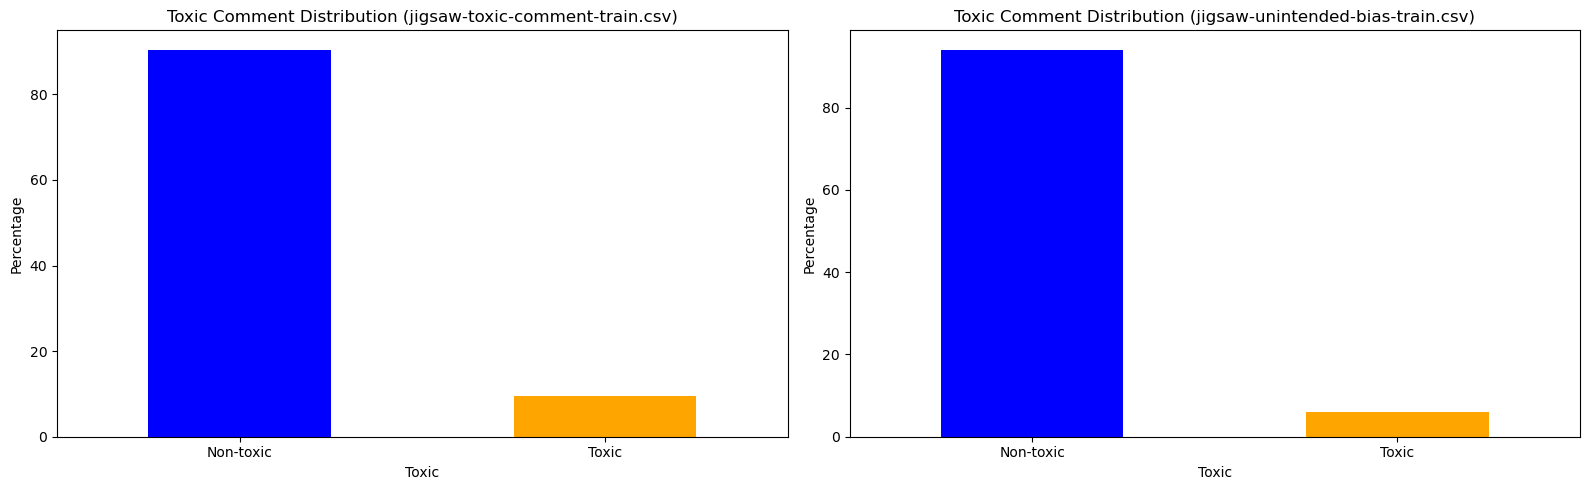

In [10]:
# Plot the distribution of toxic comments in both datasets
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
toxic_percentage.plot(kind='bar', color=['blue', 'orange'])
plt.title('Toxic Comment Distribution (jigsaw-toxic-comment-train.csv)')
plt.xlabel('Toxic')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Non-toxic', 'Toxic'], rotation=0)

plt.subplot(1, 2, 2)
unintended_bias_toxic_percentage.plot(kind='bar', color=['blue', 'orange'])
plt.title('Toxic Comment Distribution (jigsaw-unintended-bias-train.csv)')
plt.xlabel('Toxic')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Non-toxic', 'Toxic'], rotation=0)

plt.tight_layout()
plt.show()

# Text Length Analysis

Now, this analysis might sounds like strange, but we do might get an insight for analysing the length of the text. For example, by comparing the distribution of text lengths for toxic and non-toxic comments, we may find that toxic comments tend to be shorter or longer than non-toxic comments. Such patterns can be informative when building your model.

In [11]:
# Calculate comment length in characters
toxic_comment['char_length'] = toxic_comment['comment_text'].apply(len)

# Calculate comment length in words
toxic_comment['word_length'] = toxic_comment['comment_text'].apply(lambda x: len(x.split()))

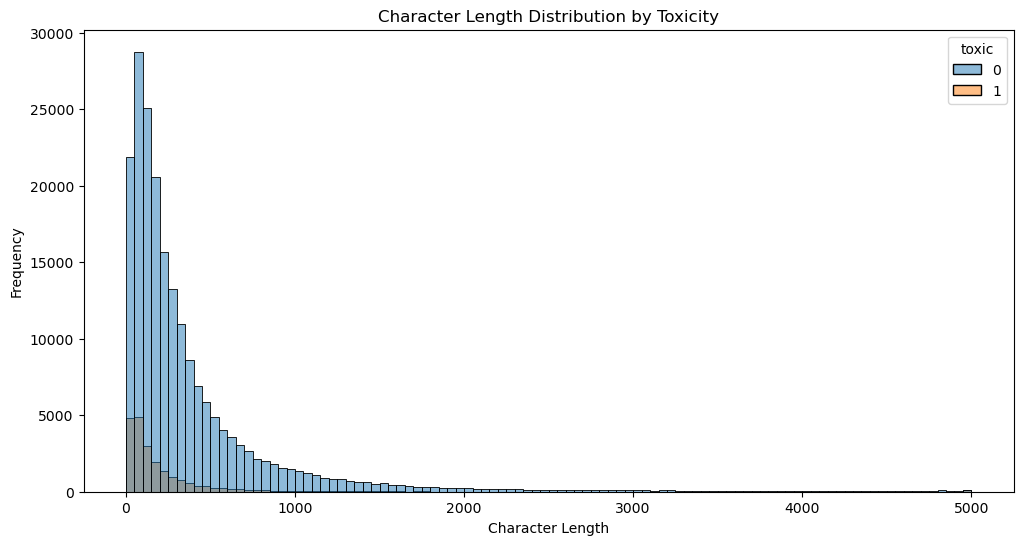

In [12]:
# Plot character length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=toxic_comment, x='char_length', hue='toxic', bins=100, common_norm=False)
plt.title('Character Length Distribution by Toxicity')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

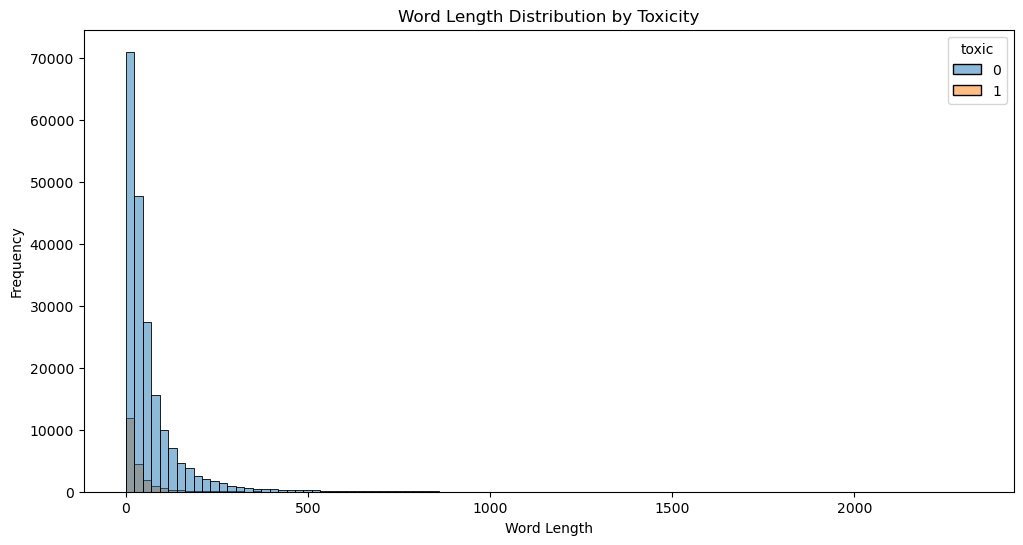

In [13]:
# Plot word length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=toxic_comment, x='word_length', hue='toxic', bins=100, common_norm=False)
plt.title('Word Length Distribution by Toxicity')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

The distribution itself seems like it's more right-skewed for both toxic and non-toxic comment. But, there are some outliers as well, which kinda looks like the outliers is for the non-toxic comment. Does this mean anything? Well, maybe, since we can make an assumption if the toxic comment tends to be shorter than the non toxic comments, but we can't really depends on that since the non toxic comment also has right skewed distribution.

The question that I want to ask is, are we interested with words with more length? To answer it, let's visualize the distribution once more, but we will only see from **> 2000 word length**.

In [14]:
# Create a new column 'is_toxic' to identify toxic and non-toxic comments
toxic_comment['is_toxic'] = toxic_comment['toxic'] == 1

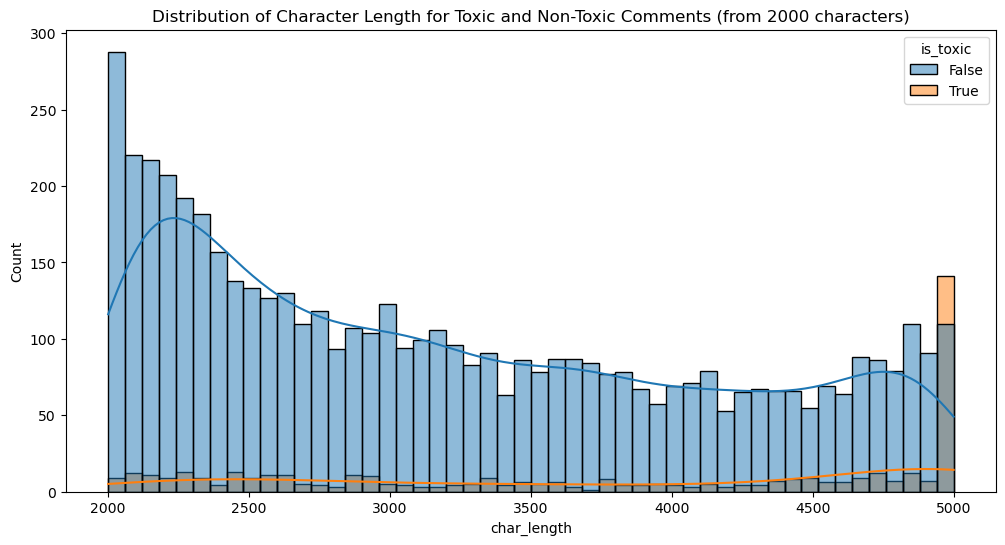

In [15]:
# Plot the distribution of character length for toxic and non-toxic comments (from 2000 characters)
plt.figure(figsize=(12, 6))
sns.histplot(data=toxic_comment[toxic_comment['char_length'] > 2000], x='char_length', hue='is_toxic', bins=50, kde=True)
plt.title('Distribution of Character Length for Toxic and Non-Toxic Comments (from 2000 characters)')
plt.show()

Now, this is interesting. See how in every bins except the last one the majority of comments are non-toxic? But then, all of a sudden, the toxic comments become majority in the last bins (around 5000, more or less). Before we continue our discussion, let's also plot the distribution for the word length.

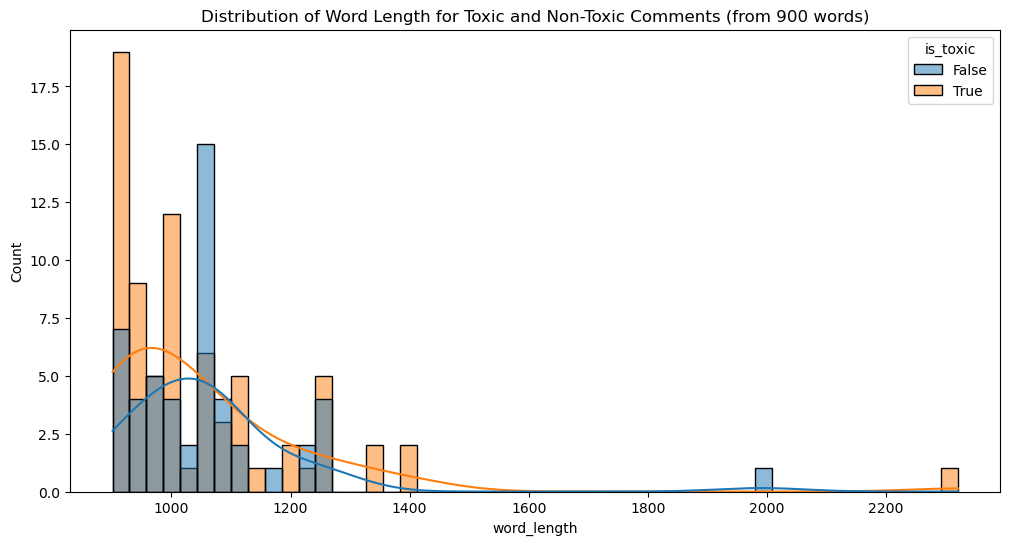

In [16]:
# Plot the distribution of word length for toxic and non-toxic comments (From 900 words)
plt.figure(figsize=(12, 6))
sns.histplot(data=toxic_comment[toxic_comment['word_length'] > 900], x='word_length', hue='is_toxic', bins=50, kde=True)
plt.title('Distribution of Word Length for Toxic and Non-Toxic Comments (from 900 words)')
plt.show()

Based on our observation, it appears that although non-toxic comments generally have a higher frequency across most bins, there is a higher proportion of toxic comments in the last bin (around 5000 words or more). This could suggest that extremely lengthy comments have a higher likelihood of containing toxic content.

Here are some possible explanations for this observation:
1. Trolls and spammers: Users who deliberately post offensive or provocative content may also be more likely to create excessively long comments to gain attention or disrupt the conversation.
2. Venting and ranting: Users who are expressing strong negative emotions might write more at length to describe their feelings, experiences, or thoughts. These longer comments could potentially contain toxic language as a result.
3. Heated debates or arguments: Long comments might emerge from extended back-and-forth discussions where users passionately argue their points. In these situations, emotions can run high, and the language used may become toxic.

However, it's essential to note that this observation alone does not necessarily imply causality, and further analysis would be needed to determine any significant relationship between comment length and toxicity. For instance, you could investigate correlations between comment length and toxicity or analyze the content of these lengthy comments to gain a deeper understanding of the context in which they appear.

Now, to see our answer, let's just print the toxic comment that has many words.

Below is the code that I made to print out the toxic comment that has > 4500 words. If you want to, you can copy this notebook and try different threshold and number of random outliers that will be printed.

In [17]:
# Set the character length threshold
char_length_threshold = 4500

# Find the outliers
outliers = toxic_comment[toxic_comment['char_length'] > char_length_threshold]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

# Randomly select a subset of outliers
num_random_outliers = 1  # Change this value to print more or fewer outliers
random_indices = random.sample(range(len(outliers)), num_random_outliers)
random_outliers = outliers.iloc[random_indices]

# Print the randomly selected outliers and their text
for idx, outlier in random_outliers.iterrows():
    print(f"\nIndex: {idx}\nComment: {outlier['comment_text']}")

Number of outliers: 914

Index: 161190
Comment: " 

 ::I find I have to agree with Teque. The introduction, for example, basically notes that some people have positive opinions of non-commercial dog food, and some people have negative opinions of commercial dog food. There is no point in either of those statements. The ""Commercial dog food"" section appears to make a comparison of canned and dry food, where the facts in question are that dry food is cheaper, lasts longer, and is ""more convenient"", and that canned food spoils faster but has a longer shelf life, and contains more protein on a dry matter basis. This isn't exactly appropriate, and all of these facts are mentioned again in the article, so this comparison seems intended to criminalize dry dog food. Further, the concept of ""dry matter"" probably needs to be explained, as anyone who hasn't taken a Nutrition course is unlikely to know what that means. If you dried out wet dog food, and then— without the water weight— compar

If you want to, you can go deeper and check if you gain any more insight for the length of text analysis.

# Word Frequency Analysis

The second thing we want to analyze is the frequency of the word. This will be very helpful, since we can detect spam and trolls, and look at the pattern on what words frequently used for toxic comment. To do this, we want tokenize the words. When we tokenize the words in a sentence or a paragraph, we essentially separate each word, taking into account punctuation, whitespace, and other delimiters. This process allows us to easily count word occurrences, perform frequency analysis, or apply other NLP techniques to the tokens.

So, the plan here is, first, we want to see what words are most frequent. Then, we might want to seperately analyzing most common words for toxic and non-toxic comments.

In [18]:
# Tokenize words in the comments
toxic_comment['tokenized_words'] = toxic_comment['comment_text'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [19]:
# Create a list of all words in the dataset
all_words = []
for words in toxic_comment['tokenized_words']:
    all_words.extend(words)

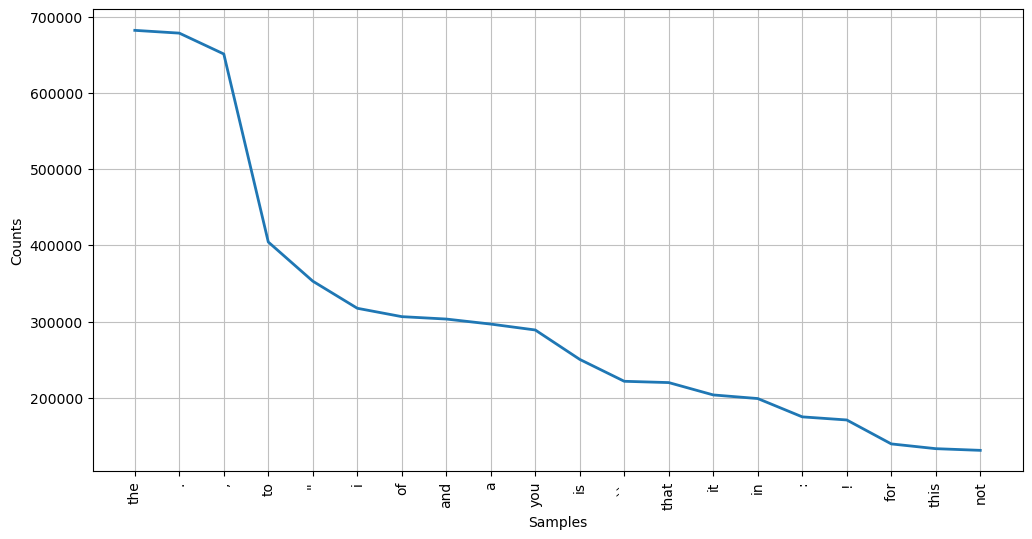

In [20]:
# Calculate the frequency distribution of words
freq_dist = FreqDist(all_words)

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
freq_dist.plot(20, cumulative=False)
plt.show()

We can see the plot above, but that plot is as useful as a paper umbrella in a hurricane. What I mean here is, of course we know that the words "the", "you", "and", and any general things will be the most common words. The second problem is the special character like ",", ".", ";", and so on.

To solve this issue, we can use a common English stopwords and isalpha function when we tokenize the words.

In [21]:
english_stopwords = set(stopwords.words('english'))

In [22]:
# Tokenize words in the comments and exclude stopwords and non-alphabetic tokens
toxic_comment['tokenized_words'] = toxic_comment['comment_text'].apply(
    lambda x: [word for word in nltk.word_tokenize(x.lower())
               if word not in english_stopwords and word.isalpha()]
    )

In [23]:
# Create a list of all words in the dataset
all_words = []
for words in toxic_comment['tokenized_words']:
    all_words.extend(words)

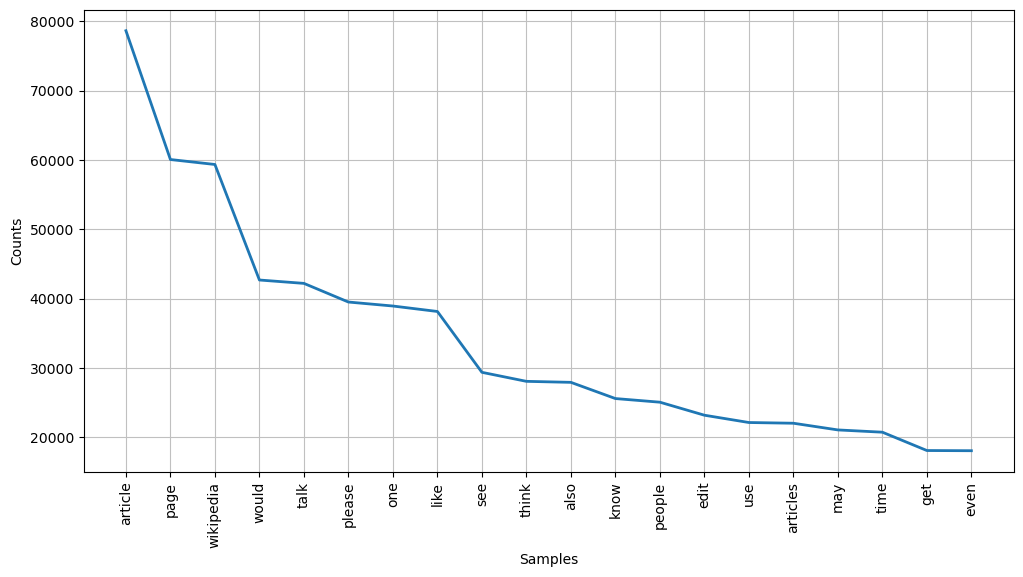

In [24]:
# Calculate the frequency distribution of words
freq_dist = FreqDist(all_words)

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
freq_dist.plot(20, cumulative=False)
plt.show()

Now this look much better. But still, the insight we gain from the plot above is just that we know the dataset we're dealing with is a comment from article.

So, the next step we want to do is to seperate the toxic and non-toxic frequent words.

In [25]:
def plot_word_frequency(words, title):
    word_freq = Counter(words)
    top_words = word_freq.most_common(20)
    word, frequency = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(word, frequency)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

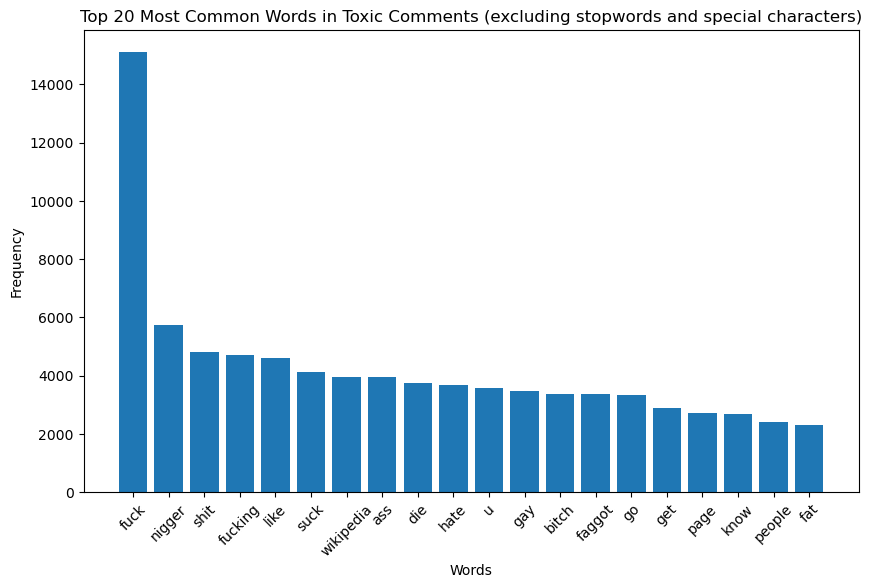

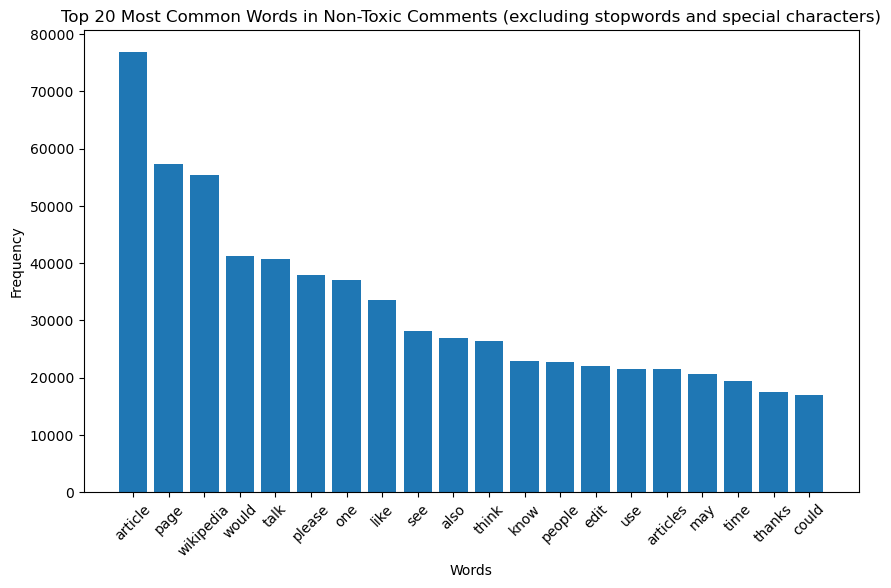

In [26]:
toxic_comments = toxic_comment[toxic_comment['toxic'] == 1]['comment_text']
non_toxic_comments = toxic_comment[toxic_comment['toxic'] == 0]['comment_text']

toxic_words = []
non_toxic_words = []

for comment in toxic_comments:
    toxic_words.extend([word.lower() for word in nltk.word_tokenize(comment) if word.lower() not in english_stopwords and word.isalpha()])

for comment in non_toxic_comments:
    non_toxic_words.extend([word.lower() for word in nltk.word_tokenize(comment) if word.lower() not in english_stopwords and word.isalpha()])

plot_word_frequency(toxic_words, "Top 20 Most Common Words in Toxic Comments (excluding stopwords and special characters)")
plot_word_frequency(non_toxic_words, "Top 20 Most Common Words in Non-Toxic Comments (excluding stopwords and special characters)")

Now we see the differences. Even though there are some non-related toxic words like "wikipedia" and "people", toxic words contains way more offensive words.

# N-grams Analysis

Analyzing word frequency is one thing, but analyzing it "sequentially" is another thing. We might want to see the continuation of the words. Yes, there are certain words that we don't need to analyze the continuation, especially the offensive words, but we're still curious how the word "people" and "wikipedia" are still in most toxic category. So, what we're going to do now is to analyze the N-grams analysis. Here, I'm going to use Bi-grams.

Bi-grams are sequences of two consecutive words, and they can provide useful insights into the relationships between words in a given text. Analyzing bi-grams can help us understand how words are commonly paired together, which can be especially informative when examining text data.

By analyzing bi-grams in toxic and non-toxic comments, we aim to identify common word pairs that appear in each category. This can help us understand the differences in language patterns between toxic and non-toxic comments. The insights gained can be valuable when building models to identify and classify toxic comments, as these patterns can be used as features for machine learning algorithms.

In [27]:
def plot_ngrams_frequency(ngrams, title):
    ngram_freq = Counter(ngrams)
    top_ngrams = ngram_freq.most_common(20)
    ngram, frequency = zip(*top_ngrams)
    ngram = [' '.join(gram) for gram in ngram]

    plt.figure(figsize=(12, 6))
    plt.bar(ngram, frequency)
    plt.title(title)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
toxic_comments = toxic_comment[toxic_comment['toxic'] == 1]['comment_text']
non_toxic_comments = toxic_comment[toxic_comment['toxic'] == 0]['comment_text']

In [29]:
def generate_ngrams(text, n):
    tokens = [token.lower() for token in nltk.word_tokenize(text) if token.lower() not in english_stopwords and token.isalpha()]
    ngrams = list(nltk.ngrams(tokens, n)) if len(tokens) >= n else []
    return ngrams

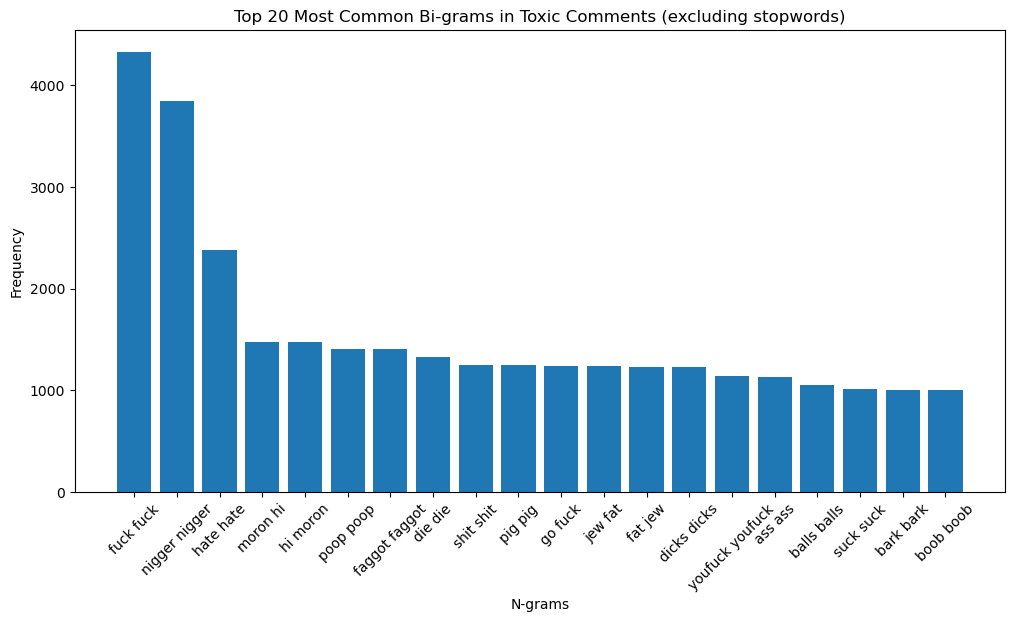

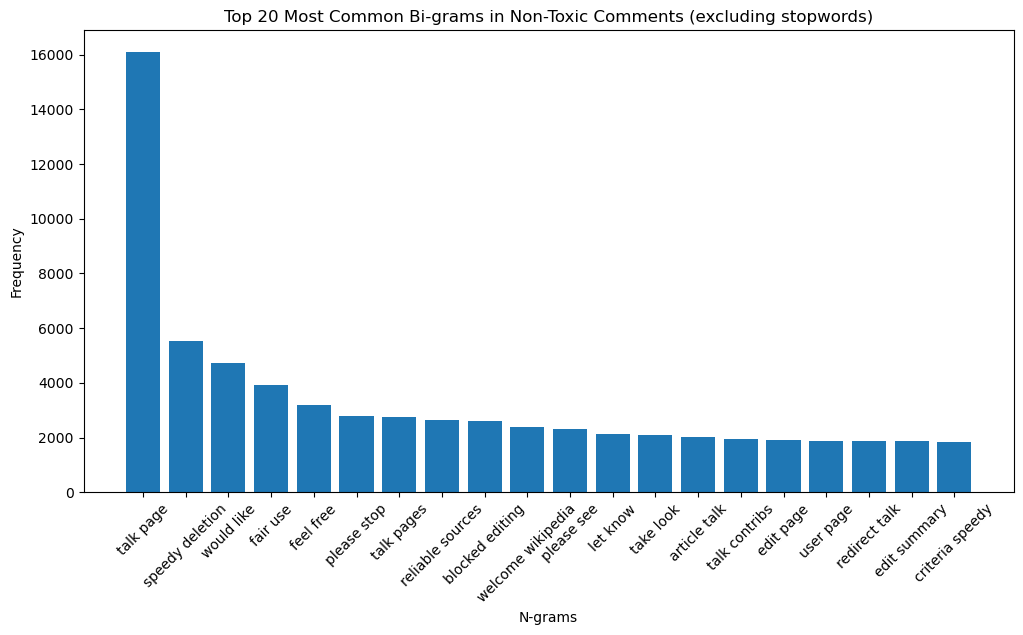

In [30]:
toxic_ngrams = []
non_toxic_ngrams = []

for comment in toxic_comments:
    toxic_ngrams.extend(generate_ngrams(comment, 2))

for comment in non_toxic_comments:
    non_toxic_ngrams.extend(generate_ngrams(comment, 2))

plot_ngrams_frequency(toxic_ngrams, "Top 20 Most Common Bi-grams in Toxic Comments (excluding stopwords)")
plot_ngrams_frequency(non_toxic_ngrams, "Top 20 Most Common Bi-grams in Non-Toxic Comments (excluding stopwords)")

Now, it's more obvious what the toxic words are. Most of them are repeatable words. We can speculate that most repeatable words are in toxic category, since I can't image someone comments like "happy happy". We could use this information to improve our model's ability to recognize toxic language.

# Sentiment Analysis

The next analysis we want to do is Sentiment Analysis. Sentiment Analysis is being used so we can understand if a piece of text is positive, negative, or neutral.

In this context, which contains comments that are labeled as toxic and non-toxic, performing sentiment analysis can provide additional insights into the emotional tone of the comments. By comparing the sentiment scores of toxic and non-toxic comments, you can explore whether there is a relationship between the sentiment and toxicity of a comment.

I used texblob to do sentiment analysis, since it's faster and more simple. I tried to use sentiment analyzer from nltk, but it's just so slow. If wanted to, or if you have accelerator in kaggle, you might want to try it. The sentiment scores you obtained using TextBlob range from -1 (most negative sentiment) to 1 (most positive sentiment), with 0 representing neutral sentiment.

In [31]:
def get_sentiment_scores(text):
    tb = TextBlob(text)
    return {'compound': tb.sentiment.polarity}

The code below is for sentiment analysis from nltk. Uncomment it if you want to use it instead.

In [32]:
# def get_sentiment_scores(text):
#     sia = SentimentIntensityAnalyzer()
#     return sia.polarity_scores(text)

In [33]:
toxic_comment['sentiment'] = toxic_comment['comment_text'].apply(get_sentiment_scores)

In [34]:
toxic_comments_sentiment = toxic_comment[toxic_comment['toxic'] == 1]['sentiment']
non_toxic_comments_sentiment = toxic_comment[toxic_comment['toxic'] == 0]['sentiment']

avg_sentiment_toxic = toxic_comments_sentiment.apply(lambda x: x['compound']).mean()
avg_sentiment_non_toxic = non_toxic_comments_sentiment.apply(lambda x: x['compound']).mean()

print("Average sentiment score for toxic comments:", avg_sentiment_toxic)
print("Average sentiment score for non-toxic comments:", avg_sentiment_non_toxic)

Average sentiment score for toxic comments: -0.12343763359339562
Average sentiment score for non-toxic comments: 0.08777209053996625


From the result that we've got, now we know that:
- The average sentiment score for toxic comments is approximately -0.123, which indicates that toxic comments, on average, have a somewhat negative sentiment. This is expected because toxic comments typically contain negative language, insults, or offensive content.
- The average sentiment score for non-toxic comments is approximately 0.088, which indicates that non-toxic comments, on average, have a slightly positive sentiment. This is expected because non-toxic comments generally include more neutral or positive language, as they don't contain the negative elements present in toxic comments.

In our case, the average sentiment scores for toxic and non-toxic comments don't cover the entire range, but they still provide insights into the difference in sentiment between the two types of comments.

The average sentiment scores for toxic and non-toxic comments in our dataset indicate that there is a noticeable difference in sentiment between the two groups. Toxic comments have a somewhat negative average sentiment, while non-toxic comments have a slightly positive average sentiment. This distinction can be useful in understanding the overall sentiment differences between toxic and non-toxic comments.